In [1]:
#I cannot find an API key on this page so I just use updated csv files. 
#I also used Tableau to visualize the data.
#https://www.eia.gov/petroleum/drilling/
#put the csv in Data file

In [2]:
import numpy as np
import pandas as pd
#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
# Import the API key.
from config import EIA_key
import eia
# Import the requests library.
import requests
import matplotlib.ticker as mticker
import matplotlib as mpl
from matplotlib.dates import date2num

In [3]:
#Line Graphs
start_date = "2014-01-01"
end_date =  datetime.datetime.now()
# end_date= datetime.datetime.now()

#Bar Charts-3 bars and one pie chart
start_date_now = "2020-4-01"
end_date_now =  datetime.datetime.now()

In [4]:
##############Read in csv, get rid of columns, clean up data and convert columns#############
DUCInventory='Data/duc-data.csv'
DUCInventory_df=pd.read_csv(DUCInventory, header=[1]) 
DUCInventory_df=pd.read_csv(DUCInventory, header=[2])
# DUCInventory_df=DUCInventory_df.columns.droplevel(5)
DUCInventory_df.columns = ['Date','Anadarko_Drilled','Anadarko_Completed','Anadarko_DUC','Unnamed: 4','Appalachia_Drilled','Appalachia_Completed','Appalachia_DUC','Unnamed: 8','Bakken_Drilled','Bakken_Completed','Bakken_DUC','Unnamed: 12','Eagle Ford_Drilled','Eagle Ford_Completed', 'Eagle Ford_DUC', 'Unnamed: 16','Haynesville_Drilled','Haynesville_Completed','Haynesville_DUC', 'Unnamed: 20', 'Niobrara_Drilled','Niobrara_Completed', 'Niobrara_DUC','Unnamed: 24','Permian_Drilled','Permian_Completed', 'Permian_DUC','Unnamed: 28', 'Total_Drilled','Total_Completed','Total_DUC']                                         
DUCInventory_df=DUCInventory_df.iloc[2:81, ]
DUCInventory_df=DUCInventory_df[['Date','Anadarko_DUC','Appalachia_DUC','Bakken_DUC','Eagle Ford_DUC','Haynesville_DUC','Niobrara_DUC','Permian_DUC', 'Total_DUC']]
#if have a date format like Jan-14 for the month and year:
#then you can use pd.to_datetime(df['column'], format=%b-%y)
DUCInventory_df['Date'] = pd.to_datetime(DUCInventory_df["Date"], format='%b-%y')
DUCInventory_df.set_index('Date', inplace=True)

In [5]:
#The data was an object, so we need to convert that to an int to get rid of the commas, 
#convt to a string and then to an int
shalePlays=['Anadarko_DUC','Appalachia_DUC','Bakken_DUC','Eagle Ford_DUC','Haynesville_DUC','Niobrara_DUC','Permian_DUC', 'Total_DUC'] 
for i in shalePlays:
    DUCInventory_df[i]=pd.to_numeric(DUCInventory_df[i].astype(str).str.replace(',',''), errors='coerce')
    

#Date control for line graphs
DUCInventory_date_df = DUCInventory_df[(DUCInventory_df.index> start_date) & (DUCInventory_df.index< end_date)]
#Date control for bar and pie charts
DUCInventory_now_df=DUCInventory_date_df[(DUCInventory_date_df.index>start_date_now) & (DUCInventory_date_df.index < end_date_now)]

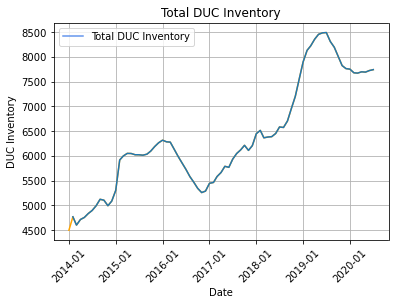

In [6]:
# #This is kind of a cool trick. 
# I plotted The whole thing from 2014 to now in line 7 with DUCInventory_df
# Then I plotted only from 2019 at the bottom with DUCInventory_date_df to get another color
fig, ax=plt.subplots(frameon=False)

ax.set_xlabel('Date')
ax.set_ylabel('DUC Inventory')
ax.plot(DUCInventory_df.index,DUCInventory_df['Total_DUC'], color='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
# ax.tick_params(axis='y', length= 10)
ax.set_title("Total DUC Inventory")
ax.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Total DUC Inventory')
plt.legend(handles=[blue_line])
plt.savefig("Total DUC Inventory.png", bbox_inches='tight')
#This is where the blune line comes from
plt.plot(DUCInventory_date_df.index,DUCInventory_date_df['Total_DUC'])
# plt.show()

[]

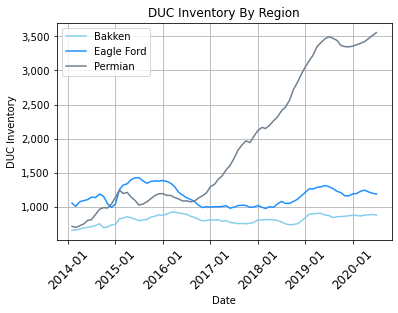

In [7]:
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter
# plot just crude prices on one graph
fig, ax=plt.subplots(frameon=False)

Plays=['Bakken_DUC','Eagle Ford_DUC','Permian_DUC']
Colors=['skyblue','dodgerblue','slategrey']
for i,j in zip(Plays,Colors):
    ax.plot(DUCInventory_date_df.index,DUCInventory_date_df[i], color=j)

show_every = 10
sparse_xticks = [None] * DUCInventory_date_df.index.shape[0]
sparse_xticks[::show_every] = DUCInventory_date_df.index[::show_every]
ax.set_xticklabels(sparse_xticks, fontsize=12)   # set sparse xtick values

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax.set_title("DUC Inventory By Region")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid()
ax.set_xlabel('Date')
ax.set_ylabel('DUC Inventory')
# defining legend style and data
lineOne = mlines.Line2D([], [], color='slategrey', label='Permian')
lineTwo = mlines.Line2D([], [], color='skyblue', label='Bakken')
lineThree = mlines.Line2D([], [], color='dodgerblue', label='Eagle Ford')
plt.legend(handles=[lineTwo, lineThree,lineOne ])
plt.savefig("Total DUC Inventory.png", bbox_inches='tight')
plt.plot()

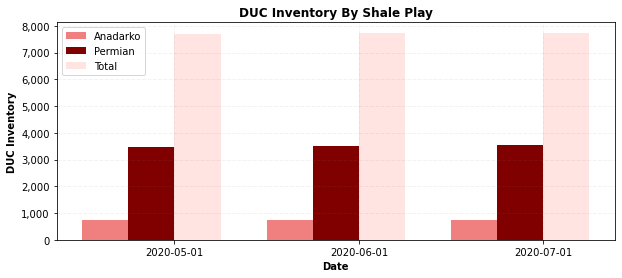

<Figure size 432x288 with 0 Axes>

In [8]:
# # plt.subplots() #return tuple that contains figure and axes objects
# fig, ax=plt.subplots() #unpack tuple into variables figure and ax
# ax.plot(x_axis, y_axis)
# # gca() #get current axis

#pandas does not know datetime so turn it into pandas.Timestamp into datetime
f=DUCInventory_now_df.index.to_pydatetime()
figure, ax=plt.subplots(figsize=(10,4))

number_groups=len(['Anadarko_DUC', 'Permian_DUC',  'Total_DUC'])
numerical=[DUCInventory_now_df['Anadarko_DUC'],DUCInventory_now_df['Permian_DUC'],DUCInventory_now_df['Total_DUC']]
bin_width=1.0/(number_groups+1)
colors = ['lightcoral', 'maroon', 'mistyrose'] 


for i in range(number_groups):
    ax.bar(x=np.arange(len([ 'Anadarko_DUC', 'Permian_DUC','Total_DUC']))+ i*bin_width,
          height=numerical[i],
          width=bin_width,
          color=colors[i])
ax.set_xticks(np.arange(len(['Anadarko_DUC', 'Permian_DUC',  'Total_DUC'])) + number_groups/(2*(number_groups+1)))

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(['2020-05-01', '2020-06-01', '2020-07-01'])
ax.legend(['Anadarko', 'Permian', 'Total'], facecolor='w')
# ax.gird()
plt.xlabel('Date', fontweight='bold')
plt.ylabel('DUC Inventory', fontweight='bold')
plt.title ("DUC Inventory By Shale Play", fontweight='bold')
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.show()
plt.savefig('DUC Inventory Bar')

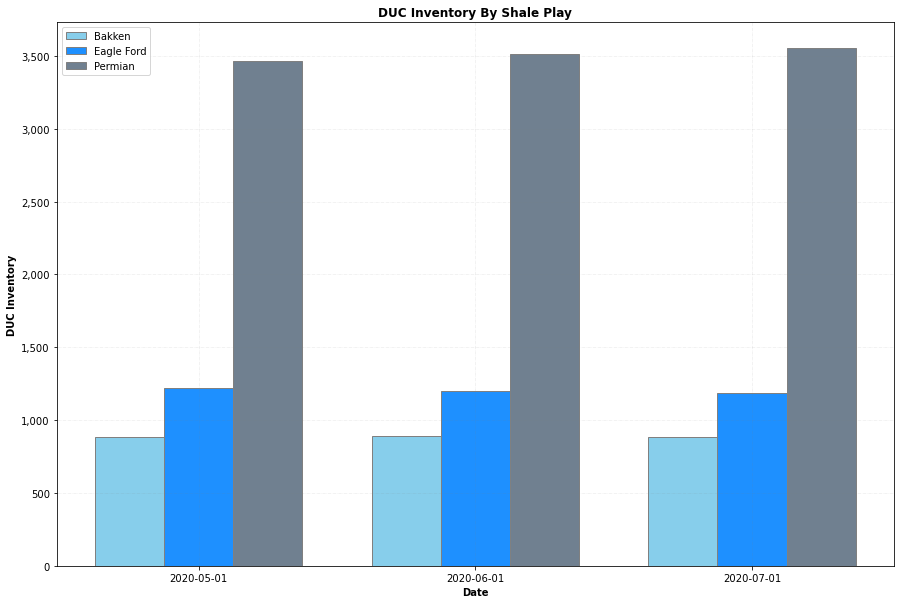

<Figure size 432x288 with 0 Axes>

In [9]:
#pandas does not know datetime so turn it into pandas.Timestamp into datetime
f=DUCInventory_now_df.index.to_pydatetime()
figure, ax=plt.subplots(figsize=(15,10)) 
bars1=[0.25,0.5,0.75]
barWidth=0.25

# Set position of bar on X axis 
br1 = np.arange(len(bars1)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]
#set the plot
br=[br1, br2, br3]
Plays=['Bakken_DUC','Eagle Ford_DUC','Permian_DUC']
Color=['skyblue','dodgerblue','slategrey']
for w,i,j in zip(br,Plays,Color):
    plt.bar(w,DUCInventory_now_df[i], color=j, width=barWidth, edgecolor='grey')


# plt.bar(br1,DUCInventory_now_df['Bakken_DUC'], color='skyblue', width=barWidth, label='Bakken', edgecolor='grey')
# plt.bar(br2,DUCInventory_now_df['Eagle Ford_DUC'], color='dodgerblue', width=barWidth, label='Eagle Ford', edgecolor='grey')
# plt.bar(br3,DUCInventory_now_df['Permian_DUC'], color='slategrey', width=barWidth, label='Permian', edgecolor='grey')

plt.xticks([r + barWidth for r in range(len(DUCInventory_now_df['Bakken_DUC']))], 
           ['2020-05-01', '2020-06-01', '2020-07-01'])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
ax.legend(['Bakken', 'Eagle Ford', 'Permian'], facecolor='w')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('DUC Inventory', fontweight='bold')
plt.title ("DUC Inventory By Shale Play", fontweight='bold')
plt.show()
plt.savefig('DUC Inventory Bar2')

C:\Users\15124\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


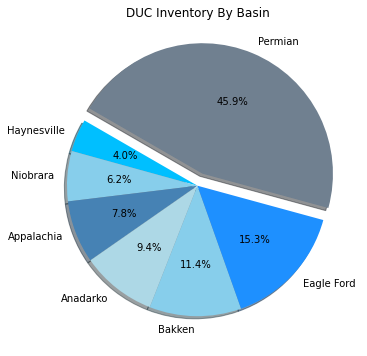

In [10]:
pie_df=DUCInventory_now_df[2:][['Haynesville_DUC','Niobrara_DUC', 'Appalachia_DUC','Anadarko_DUC','Bakken_DUC','Eagle Ford_DUC','Permian_DUC']]
## Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(pie_df,
    labels=[ "Haynesville", "Niobrara", "Appalachia", "Anadarko", "Bakken", "Eagle Ford","Permian"],
    colors=["deepskyblue", "skyblue",     "steelblue", "lightblue",  'skyblue','dodgerblue','slategrey'],
    explode=[0, 0, 0,0,0,0,0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("DUC Inventory By Basin")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("PieChart.png")
plt.show()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'datetime.datetime'

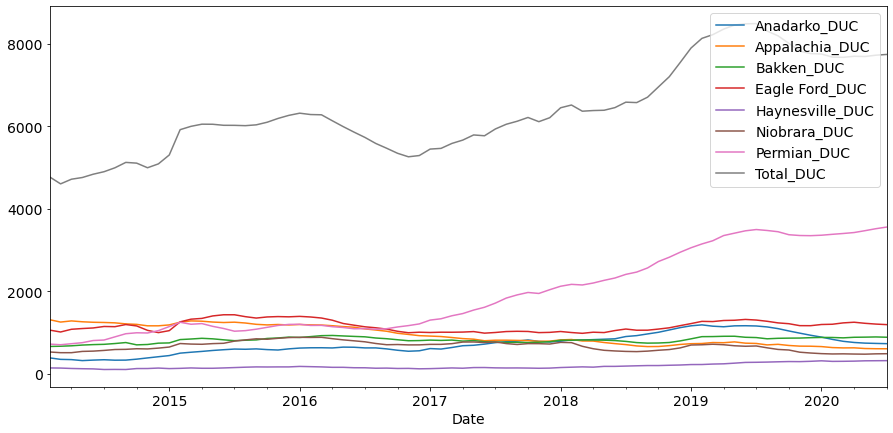

In [11]:
#this throws an error but it works
fig, ax =plt.subplots(figsize=(15,7))
DUCInventory_date_df.plot(ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(DUCInventory_date_df.index.to_pydatetime()))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# ticks = pd.date_range(start_date, end_date, freq='Y')
# ax.set_xticks(ticks)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
_=plt.xticks(rotation=45)
# plt.legend('top left')
plt.ylabel('DUC Inventory')
plt.title('DUC Inventory By Region')
ax.xaxis_date()
plt.grid()
# _=plt.xticks(rotation=45)
plt.show()

In [ ]:
DUCInventory_df.to_csv("DUCInventoryClean.csv")
